[View in Colaboratory](https://colab.research.google.com/github/djcordhose/ai/blob/master/notebooks/tensorflow/nn-training.ipynb)

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

Populating the interactive namespace from numpy and matplotlib


In [2]:
!curl -O https://raw.githubusercontent.com/DJCordhose/deep-learning-crash-course-notebooks/master/data/insurance-customers-1500.csv

In [3]:
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')
y = df['group']
df.drop('group', axis='columns', inplace=True)
X = df.as_matrix()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
from tensorflow.keras.layers import Dense

model = keras.Sequential()

model.add(Dense(units=50, activation='relu', input_dim=3))
model.add(Dense(units=3, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 153       
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [6]:
BATCH_SIZE=1000
EPOCHS = 2000

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

%time history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=0)

Wall time: 12.8 s


In [7]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE)
train_accuracy

1200/1200 [==============================] - 0s 4us/step


0.7083333233992258

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
test_accuracy

300/300 [==============================] - 0s 7us/step


0.7166666388511658

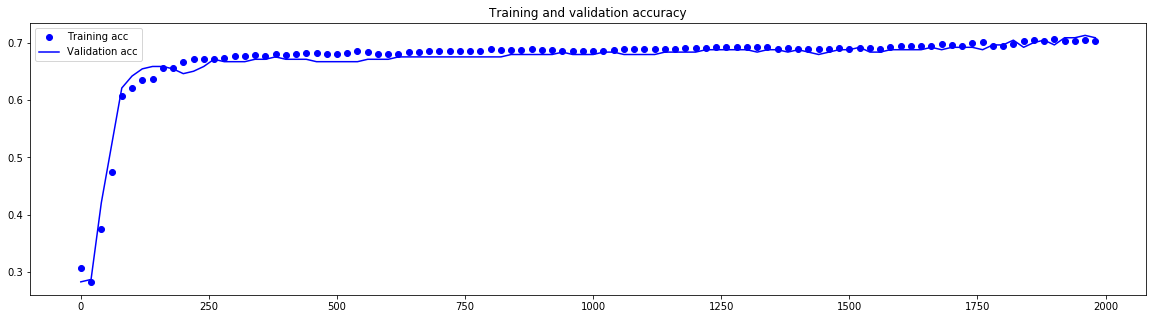

In [9]:
def plot_history(history, samples=100, init_phase_samples=None):
    epochs = history.params['epochs']
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    every_sample =  int(epochs / samples)
    acc = pd.DataFrame(acc).iloc[::every_sample, :]
    val_acc = pd.DataFrame(val_acc).iloc[::every_sample, :]

    fig, ax = plt.subplots(figsize=(20,5))

    ax.plot(acc, 'bo', label='Training acc')
    ax.plot(val_acc, 'b', label='Validation acc')
    ax.set_title('Training and validation accuracy')
    ax.legend()

plot_history(history)

In [10]:
model.predict(np.array([[100, 47, 10]]))

array([[0.15674245, 0.6605879 , 0.18266964]], dtype=float32)